In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display  import Image
from scipy import *
import scipy.linalg as la


In [3]:
def f(x):
    return x**3 #define the function

In [4]:
from scipy.integrate import quad, dblquad, tplquad

In [5]:
#Defining lower and upper limits for integration
lower = 0
upper = 1
val, abserror = quad(f,lower,upper) # calculating integral
print(val, abserror)



0.25 2.7755575615628914e-15


In [6]:
def integrand(x,y):
    return exp(-x**2 - y**2)

In [7]:
x_lower = 0
x_upper = 10
y_lower = 0
y_upper =10
val,abserror = dblquad(integrand,x_lower,x_upper,lambda x: y_lower, lambda x: y_upper)
print(val,abserror)


0.7853981633974476 1.3753098510218528e-08


In [8]:
from scipy.integrate import odeint,ode

In [9]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

In [10]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [11]:
x0 = [pi/4,pi/2,0,0]
t = linspace(0,10,250)


In [12]:
x = odeint(dx,x0,t)



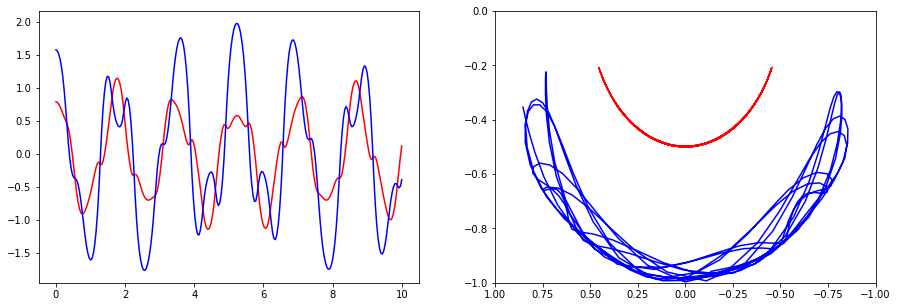

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].plot(t,x[:,0],'r',label = 'theta1')
axes[0].plot(t,x[:,1],'b',label = 'theta2')


x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

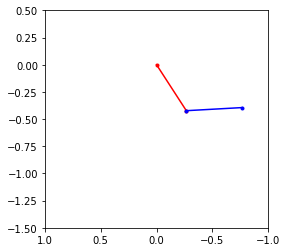

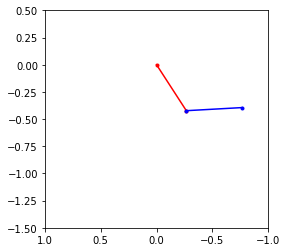

In [14]:
from IPython.display import display, clear_output
import time

fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):

    x1 = + L * sin(x[t_idx, 0])
    y1 = - L * cos(x[t_idx, 0])

    x2 = x1 + L * sin(x[t_idx, 1])
    y2 = y1 - L * cos(x[t_idx, 1])
    
    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    clear_output() 
    display(fig)

    time.sleep(0.03)
    

In [26]:
#oscillatior with only 1 DoF

def dy(y,t,zeta,w0):
    
    x,p = y[0], y[1]
    dx = p
    dp = -2*zeta*w0*p - w0**2 * x
    return [dx,dp]

y0 = [1.0,0.0] #initial displacement, initial velocity
t = linspace(0,10,1000)
w0 = 2*pi*1.0 #excitation frequency of one hertz


In [27]:
#creating solution vectors

y1 = odeint(dy,y0,t,args=(0.0,w0))
y2 = odeint(dy,y0,t,args=(0.2,w0))
y3 = odeint(dy,y0,t,args=(1.0,w0))
y4 = odeint(dy,y0,t,args=(5.0,w0))




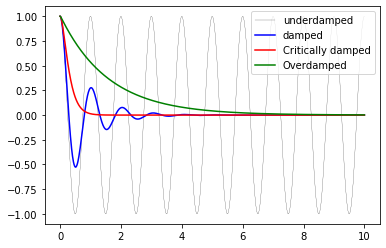

In [32]:
fig, ax = plt.subplots()
ax.plot(t,y1[:,0], 'k', label = 'underdamped',lw=0.2)
ax.plot(t,y2[:,0], 'b', label = 'damped')
ax.plot(t,y3[:,0], 'r', label = 'Critically damped')
ax.plot(t,y4[:,0], 'g', label = 'Overdamped')
ax.legend()

In [33]:
#Fourier
from numpy.fft import fftfreq
from scipy.fftpack import *

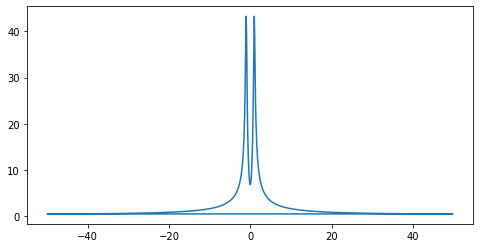

In [37]:
N = len(t) # number of samples
dt = t[1] - t[0]
F = fft(y2[:,0])
w = fftfreq(N,dt)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(w, abs(F))


(0, 5)

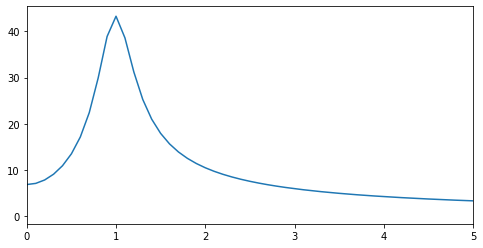

In [43]:
# modifying plot in order to only show right hand side of frequency spectrum
#mask = where(w>=0)
w_pos = w[w>=0]
F_pos = F[w>=0]

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0,5) # The highest amplitude shall be equal to the initial frequency chosen

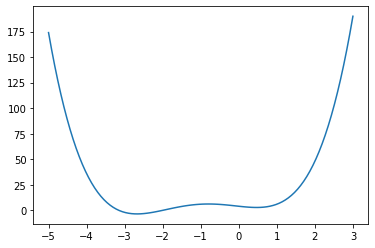

In [44]:
# Optimization
from scipy import optimize

def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax = plt.subplots()
x = linspace(-5,3,100)
ax.plot(x,f(x))

In [46]:
x_min = optimize.fmin_bfgs(f, 3) # it can easily go to local minimum
print(x_min)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 9
         Function evaluations: 30
         Gradient evaluations: 10
[0.46961746]


In [48]:
optimize.brent(f)

0.46961743402759754

In [50]:
optimize.fminbound(f, -4, 2) # find global minimum inside this range

-2.6729822917513886

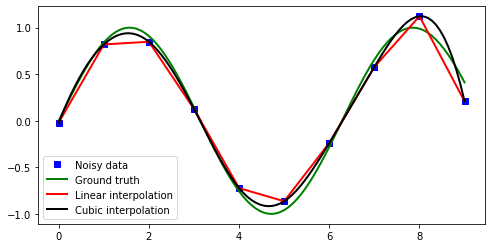

In [67]:
#Interpolation

from scipy.interpolate import *

def f(x):
    return sin(x)

n = arange(0,10) # number of samples
x = linspace(0,9,100)

y_measured = f(n) + 0.1*random.randn(len(n))
y_ground = f(x)

lin_int = interp1d(n, y_measured)
y_int1 = lin_int(x)

cub_int = interp1d(n, y_measured, kind = 'cubic')
y_int2 = cub_int(x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(n,y_measured, "bs", label = 'Noisy data')
ax.plot(x,y_ground, 'g', lw = 2, label = 'Ground truth')
ax.plot(x,y_int1, 'r', lw = 2, label = 'Linear interpolation')
ax.plot(x,y_int2, 'k', lw = 2, label = 'Cubic interpolation')
ax.legend()

(array([ 4., 16., 22., 20.,  0., 20., 12.,  2.,  3.,  1.]),
 array([ 5. ,  5.8,  6.6,  7.4,  8.2,  9. ,  9.8, 10.6, 11.4, 12.2, 13. ]),
 <a list of 10 Patch objects>)

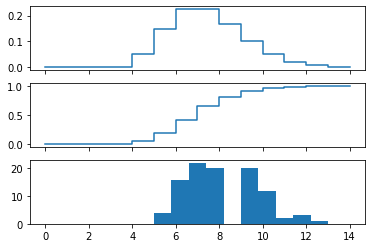

In [73]:
#Statistical Testing

from scipy import stats
X = stats.poisson(3,5)
n = arange(0,15)

fig,ax = plt.subplots(3,1, sharex = True)
ax[0].step(n, X.pmf(n))
ax[1].step(n, X.cdf(n))
ax[2].hist(X.rvs(size=100))

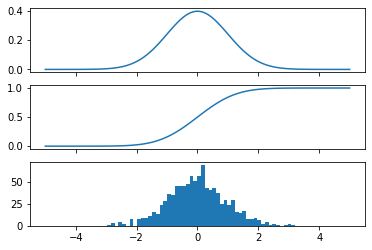

In [83]:
Y = stats.norm()
x = linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);